<a href="https://colab.research.google.com/github/samikshagadhave/binary_classification/blob/main/Binary_classification_for_Good_%26_Bad_dataset_with_EfficientNetB6_model_on_T51%26T52%26T53%26T54%26T57%26T58.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive

/content/gdrive


In [ ]:
import pandas as pd

df=pd.read_excel(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train 1.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
#print(Bad_dataset)

Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/train/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train/bad_dataset/"

img_path_Good_dataset =r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


df=pd.read_excel(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test 1.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/test/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/"
img_path_Good_dataset =r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have bee

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train',
    labels='inferred',
    label_mode='int',
    batch_size=4,
    image_size=(528,528)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test',
    labels='inferred',
    label_mode='int',
    batch_size=4,
    image_size=(528,528)
)
print(train_ds)
print(validation_ds)
from tensorflow.keras.applications import EfficientNetB6
model=EfficientNetB6(weights='imagenet',include_top=False,input_shape=(528,528,3))
my_model=Sequential([model,
                     Conv2D(1024,3,1,activation='relu'),
                     GlobalAveragePooling2D(),
                     Dense(1024,activation='relu'),
                     Dropout(0.2),
                     Dense(1024,activation='relu'),
                     Dropout(0.2),
                     Dense(1,activation='sigmoid'),
                     ])

my_model.summary()




Found 198 files belonging to 2 classes.
Found 86 files belonging to 2 classes.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 528, 528, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 528, 528, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
165234480/165234480 [==============================] - 8s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb6 (Functional)  (None, 17, 17, 2304)     40960143  
                                                                 
 conv2d (Conv2D)             (None, 15, 15, 1024)      21234688  
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
  

In [ ]:
train_ds=train_ds.prefetch(tf.data.AUTOTUNE)
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 528, 528, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
validation_ds=validation_ds.prefetch(tf.data.AUTOTUNE)
validation_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 528, 528, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import metrics
metrics=['accuracy']
my_model.compile(loss=BinaryCrossentropy(),optimizer=Adam(learning_rate=0.001),metrics=metrics)

In [ ]:
history=my_model.fit(train_ds,epochs=30,validation_data=validation_ds)

Epoch 1/30
50/50 [==============================] - 71s 1s/step - loss: 0.1108 - accuracy: 0.9747 - val_loss: 7.3358 - val_accuracy: 0.3372
Epoch 2/30
50/50 [==============================] - 58s 1s/step - loss: 0.0442 - accuracy: 0.9899 - val_loss: 3.8705 - val_accuracy: 0.3837
Epoch 3/30
50/50 [==============================] - 57s 1s/step - loss: 7.5912e-04 - accuracy: 1.0000 - val_loss: 3.9764 - val_accuracy: 0.3837
Epoch 4/30
50/50 [==============================] - 57s 1s/step - loss: 1.3006e-04 - accuracy: 1.0000 - val_loss: 4.2285 - val_accuracy: 0.3837
Epoch 5/30
50/50 [==============================] - 59s 1s/step - loss: 0.0499 - accuracy: 0.9949 - val_loss: 3.6863 - val_accuracy: 0.3721
Epoch 6/30
50/50 [==============================] - 58s 1s/step - loss: 0.1694 - accuracy: 0.9596 - val_loss: 2.3918 - val_accuracy: 0.5930
Epoch 7/30
50/50 [==============================] - 58s 1s/step - loss: 0.1796 - accuracy: 0.9495 - val_loss: 1.9268 - val_accuracy: 0.6163
Epoch 8/30
5

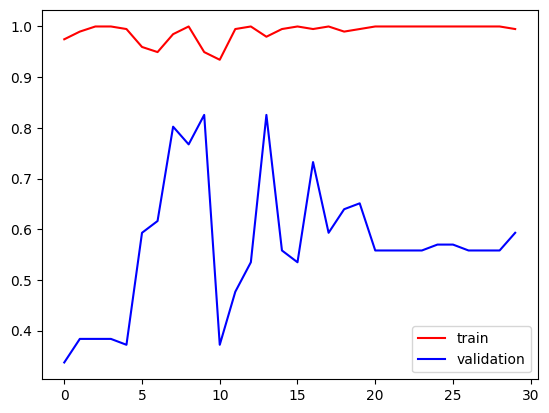

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

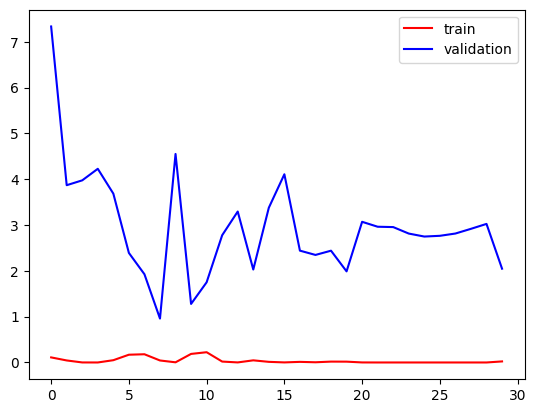

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0066.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 4s 4s/step
[[0.00056059]
 [0.00056059]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0108.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 75ms/step
[[0.0020352]
 [0.0020352]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0110.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 53ms/step
[[0.00024823]
 [0.00024823]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0489.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[0.99994254]
 [0.99994254]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0491.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0493.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)
prediction>0.5

1/1 [==============================] - 0s 57ms/step
[[0.01139412]
 [0.01139412]]


array([[False],
       [False]])

In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0495.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)


1/1 [==============================] - 0s 63ms/step
[[0.5594005]
 [0.5594005]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0497.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 54ms/step
[[0.9891065]
 [0.9891065]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0499.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[0.9808837]
 [0.9808837]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0501.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[0.9859409]
 [0.9859409]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0503.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[0.9977187]
 [0.9977187]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0505.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 63ms/step
[[0.99867564]
 [0.99867564]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0507.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 53ms/step
[[0.986016]
 [0.986016]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0509.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 53ms/step
[[0.9999869]
 [0.9999869]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0608.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[0.99254465]
 [0.99254465]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0610.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 53ms/step
[[0.97452503]
 [0.97452503]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0976.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 67ms/step
[[0.0046785]
 [0.0046785]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0978.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[2.4678904e-05]
 [2.4678904e-05]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0980.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 59ms/step
[[0.9937283]
 [0.9937283]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0982.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 62ms/step
[[0.9790911]
 [0.9790911]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0984.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 55ms/step
[[0.9928848]
 [0.9928848]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0986.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[0.993856]
 [0.993856]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0869.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 64ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0871.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 53ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0873.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0875.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 59ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0877.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 55ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0879.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 53ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0881.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0883.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0885.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0887.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 50ms/step
[[0.00111257]
 [0.00111257]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0889.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 66ms/step
[[0.12551564]
 [0.12551564]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0891.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[0.99864227]
 [0.99864227]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0893.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 53ms/step
[[0.99695504]
 [0.99695504]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0895.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 55ms/step
[[0.9961008]
 [0.9961008]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0897.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[0.6741685]
 [0.6741685]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0899.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[0.01717129]
 [0.01717129]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0901.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 64ms/step
[[0.9883499]
 [0.9883499]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0903.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 50ms/step
[[0.9874671]
 [0.9874671]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0905.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[0.2189003]
 [0.2189003]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0907.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 66ms/step
[[0.9997049]
 [0.9997049]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0909.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 55ms/step
[[0.997143]
 [0.997143]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0911.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[0.9998386]
 [0.9998386]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0913.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 50ms/step
[[0.9999361]
 [0.9999361]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0915.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[0.99999464]
 [0.99999464]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0917.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 54ms/step
[[0.99998736]
 [0.99998736]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0919.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 53ms/step
[[0.99935716]
 [0.99935716]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0921.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 53ms/step
[[0.9994578]
 [0.9994578]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0923.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 57ms/step
[[0.99999976]
 [0.99999976]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0925.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 56ms/step
[[0.99998426]
 [0.99998426]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0927.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 53ms/step
[[0.99976796]
 [0.99976796]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0929.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[0.99996865]
 [0.99996865]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0931.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 50ms/step
[[0.99999964]
 [0.99999964]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0933.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[0.999997]
 [0.999997]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0935.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 67ms/step
[[0.00159449]
 [0.00159449]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0937.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 50ms/step
[[0.996813]
 [0.996813]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0939.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[0.97200215]
 [0.97200215]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0941.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 55ms/step
[[0.00185269]
 [0.00185269]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0943.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 65ms/step
[[0.00071411]
 [0.00071411]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0945.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[0.07298041]
 [0.07298041]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0947.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[0.97149974]
 [0.97149974]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0949.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 61ms/step
[[0.9999982]
 [0.9999982]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0951.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 63ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0953.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 54ms/step
[[0.9999999]
 [0.9999999]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0955.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 56ms/step
[[0.9999999]
 [0.9999999]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0957.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 51ms/step
[[0.99999964]
 [0.99999964]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0959.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 55ms/step
[[1.]
 [1.]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0961.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 50ms/step
[[0.99956375]
 [0.99956375]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0963.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[0.01173404]
 [0.01173404]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0965.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[0.9999496]
 [0.9999496]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0967.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 56ms/step
[[0.00213414]
 [0.00213414]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0969.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 65ms/step
[[0.5091571]
 [0.5091571]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0971.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 55ms/step
[[0.05067952]
 [0.05067952]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0973.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 53ms/step
[[0.23100393]
 [0.23100393]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0975.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 74ms/step
[[0.22632577]
 [0.22632577]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0977.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 53ms/step
[[0.4327812]
 [0.4327812]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0979.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 54ms/step
[[0.96267694]
 [0.96267694]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0981.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 50ms/step
[[0.9989567]
 [0.9989567]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0983.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 74ms/step
[[0.9999906]
 [0.9999906]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0985.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 54ms/step
[[0.99998736]
 [0.99998736]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0987.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 55ms/step
[[0.9999975]
 [0.9999975]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0989.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[0.7920455]
 [0.7920455]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0991.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 52ms/step
[[0.9913083]
 [0.9913083]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0993.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 62ms/step
[[0.6085975]
 [0.6085975]]


In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0995.jpg')
test_img=cv2.resize(test_img,(528,528))
test_img
img=np.asarray(test_img)
img.shape
from copy import deepcopy
img_2=deepcopy(img)
images=[img,img_2]
prediction=my_model.predict(np.array(images))
print(prediction)

1/1 [==============================] - 0s 53ms/step
[[0.99823016]
 [0.99823016]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
truth=['bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
prediction=['bad','bad','bad','good','good','bad','good','good','good','good','good','good','good','good','good','good','bad','bad','good','good','good','good','good','good','good','good','good','good','good','good','good','good','bad','bad','good','good','good','good','bad','good','good','bad','good','good','good','good','good','good','good','good','good','good','good','good','good','good','bad','good','good','bad','bad','bad','good','good','good','good','good','good','good','good','bad','good','bad','good','bad','bad','bad','bad','good','good','good','good','good','good','good','good']
print(classification_report(truth,prediction))
print(confusion_matrix(truth,prediction))

              precision    recall  f1-score   support

         bad       0.30      0.27      0.29        22
        good       0.76      0.78      0.77        64

    accuracy                           0.65        86
   macro avg       0.53      0.53      0.53        86
weighted avg       0.64      0.65      0.65        86

[[ 6 16]
 [14 50]]
